<a href="https://colab.research.google.com/github/Yassaadel/Depi.gov/blob/master/weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,7/4/2009,Tuggeranong,-1.3,12.5,0.0,WSW,48.0,NaN,WNW,0.0,22.0,78.0,56.0,1014.0,1012.5,3.1,10.2,No,No
49239,7/5/2009,Tuggeranong,1.0,12.5,0.0,NW,30.0,SE,NNW,2.0,15.0,66.0,53.0,1017.4,1017.1,6.2,11.4,No,No
49240,7/6/2009,Tuggeranong,-3.7,9.7,0.0,WNW,17.0,NaN,NNW,0.0,9.0,89.0,57.0,1021.8,1019.1,0.5,8.4,No,No
49241,7/7/2009,Tuggeranong,-1.9,10.6,0.0,SE,37.0,SSE,SSE,19.0,9.0,66.0,45.0,1026.9,1025.3,5.1,10.0,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49243 entries, 0 to 49242
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49243 non-null  object 
 1   Location       49243 non-null  object 
 2   MinTemp        48720 non-null  float64
 3   MaxTemp        48857 non-null  float64
 4   Rainfall       47987 non-null  float64
 5   WindGustDir    43755 non-null  object 
 6   WindGustSpeed  43762 non-null  float64
 7   WindDir9am     43849 non-null  object 
 8   WindDir3pm     46836 non-null  object 
 9   WindSpeed9am   48133 non-null  float64
 10  WindSpeed3pm   47506 non-null  float64
 11  Humidity9am    48471 non-null  float64
 12  Humidity3pm    47860 non-null  float64
 13  Pressure9am    42261 non-null  float64
 14  Pressure3pm    42308 non-null  float64
 15  Temp9am        48752 non-null  float64
 16  Temp3pm        48099 non-null  float64
 17  RainToday      47986 non-null  object 
 18  RainTo

In [6]:
df = pd.DataFrame(data,columns =['Date','Location','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
df

,Date,Location,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall
0,12/1/2008,Albury,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.6
1,12/2/2008,Albury,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12/3/2008,Albury,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,12/4/2008,Albury,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,12/5/2008,Albury,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,7/4/2009,Tuggeranong,-1.3,12.5,48.0,0.0,22.0,78.0,56.0,1014.0,1012.5,3.1,10.2,0.0
49239,7/5/2009,Tuggeranong,1.0,12.5,30.0,2.0,15.0,66.0,53.0,1017.4,1017.1,6.2,11.4,0.0
49240,7/6/2009,Tuggeranong,-3.7,9.7,17.0,0.0,9.0,89.0,57.0,1021.8,1019.1,0.5,8.4,0.0
49241,7/7/2009,Tuggeranong,-1.9,10.6,37.0,19.0,9.0,66.0,45.0,1026.9,1025.3,5.1,10.0,0.0


In [7]:
# prompt: Using dataframe df: clean data

import pandas as pd
# Convert Date column to datetime object and handle parsing errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing values (example: fill with mean for numerical columns)
numerical_cols = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Rainfall']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [9]:
# prompt: Using dataframe df: show data

df.info() # This will display the first few rows of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49243 entries, 0 to 49242
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           49243 non-null  datetime64[ns]
 1   Location       49243 non-null  object        
 2   MinTemp        49243 non-null  float64       
 3   MaxTemp        49243 non-null  float64       
 4   WindGustSpeed  49243 non-null  float64       
 5   WindSpeed9am   49243 non-null  float64       
 6   WindSpeed3pm   49243 non-null  float64       
 7   Humidity9am    49243 non-null  float64       
 8   Humidity3pm    49243 non-null  float64       
 9   Pressure9am    49243 non-null  float64       
 10  Pressure3pm    49243 non-null  float64       
 11  Temp9am        49243 non-null  float64       
 12  Temp3pm        49243 non-null  float64       
 13  Rainfall       49243 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 5.3+ MB


In [10]:
df.isnull().sum()


,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0


In [11]:
df.shape

(49243, 14)

In [12]:
df = pd.DataFrame(data,columns =['Date','Location','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
df

,Date,Location,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Rainfall
0,12/1/2008,Albury,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.6
1,12/2/2008,Albury,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12/3/2008,Albury,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,12/4/2008,Albury,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,12/5/2008,Albury,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,7/4/2009,Tuggeranong,-1.3,12.5,48.0,0.0,22.0,78.0,56.0,1014.0,1012.5,3.1,10.2,0.0
49239,7/5/2009,Tuggeranong,1.0,12.5,30.0,2.0,15.0,66.0,53.0,1017.4,1017.1,6.2,11.4,0.0
49240,7/6/2009,Tuggeranong,-3.7,9.7,17.0,0.0,9.0,89.0,57.0,1021.8,1019.1,0.5,8.4,0.0
49241,7/7/2009,Tuggeranong,-1.9,10.6,37.0,19.0,9.0,66.0,45.0,1026.9,1025.3,5.1,10.0,0.0


In [16]:
categorical = [var for var in df.columns if df[var].dtype=='O']
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
label_encoder = preprocessing.LabelEncoder()

# Iterate and transform, excluding 'Date' and 'WindGustDir'
for col in categorical:
    if col not in ['Date']:
        df[col] = label_encoder.fit_transform(df[col])

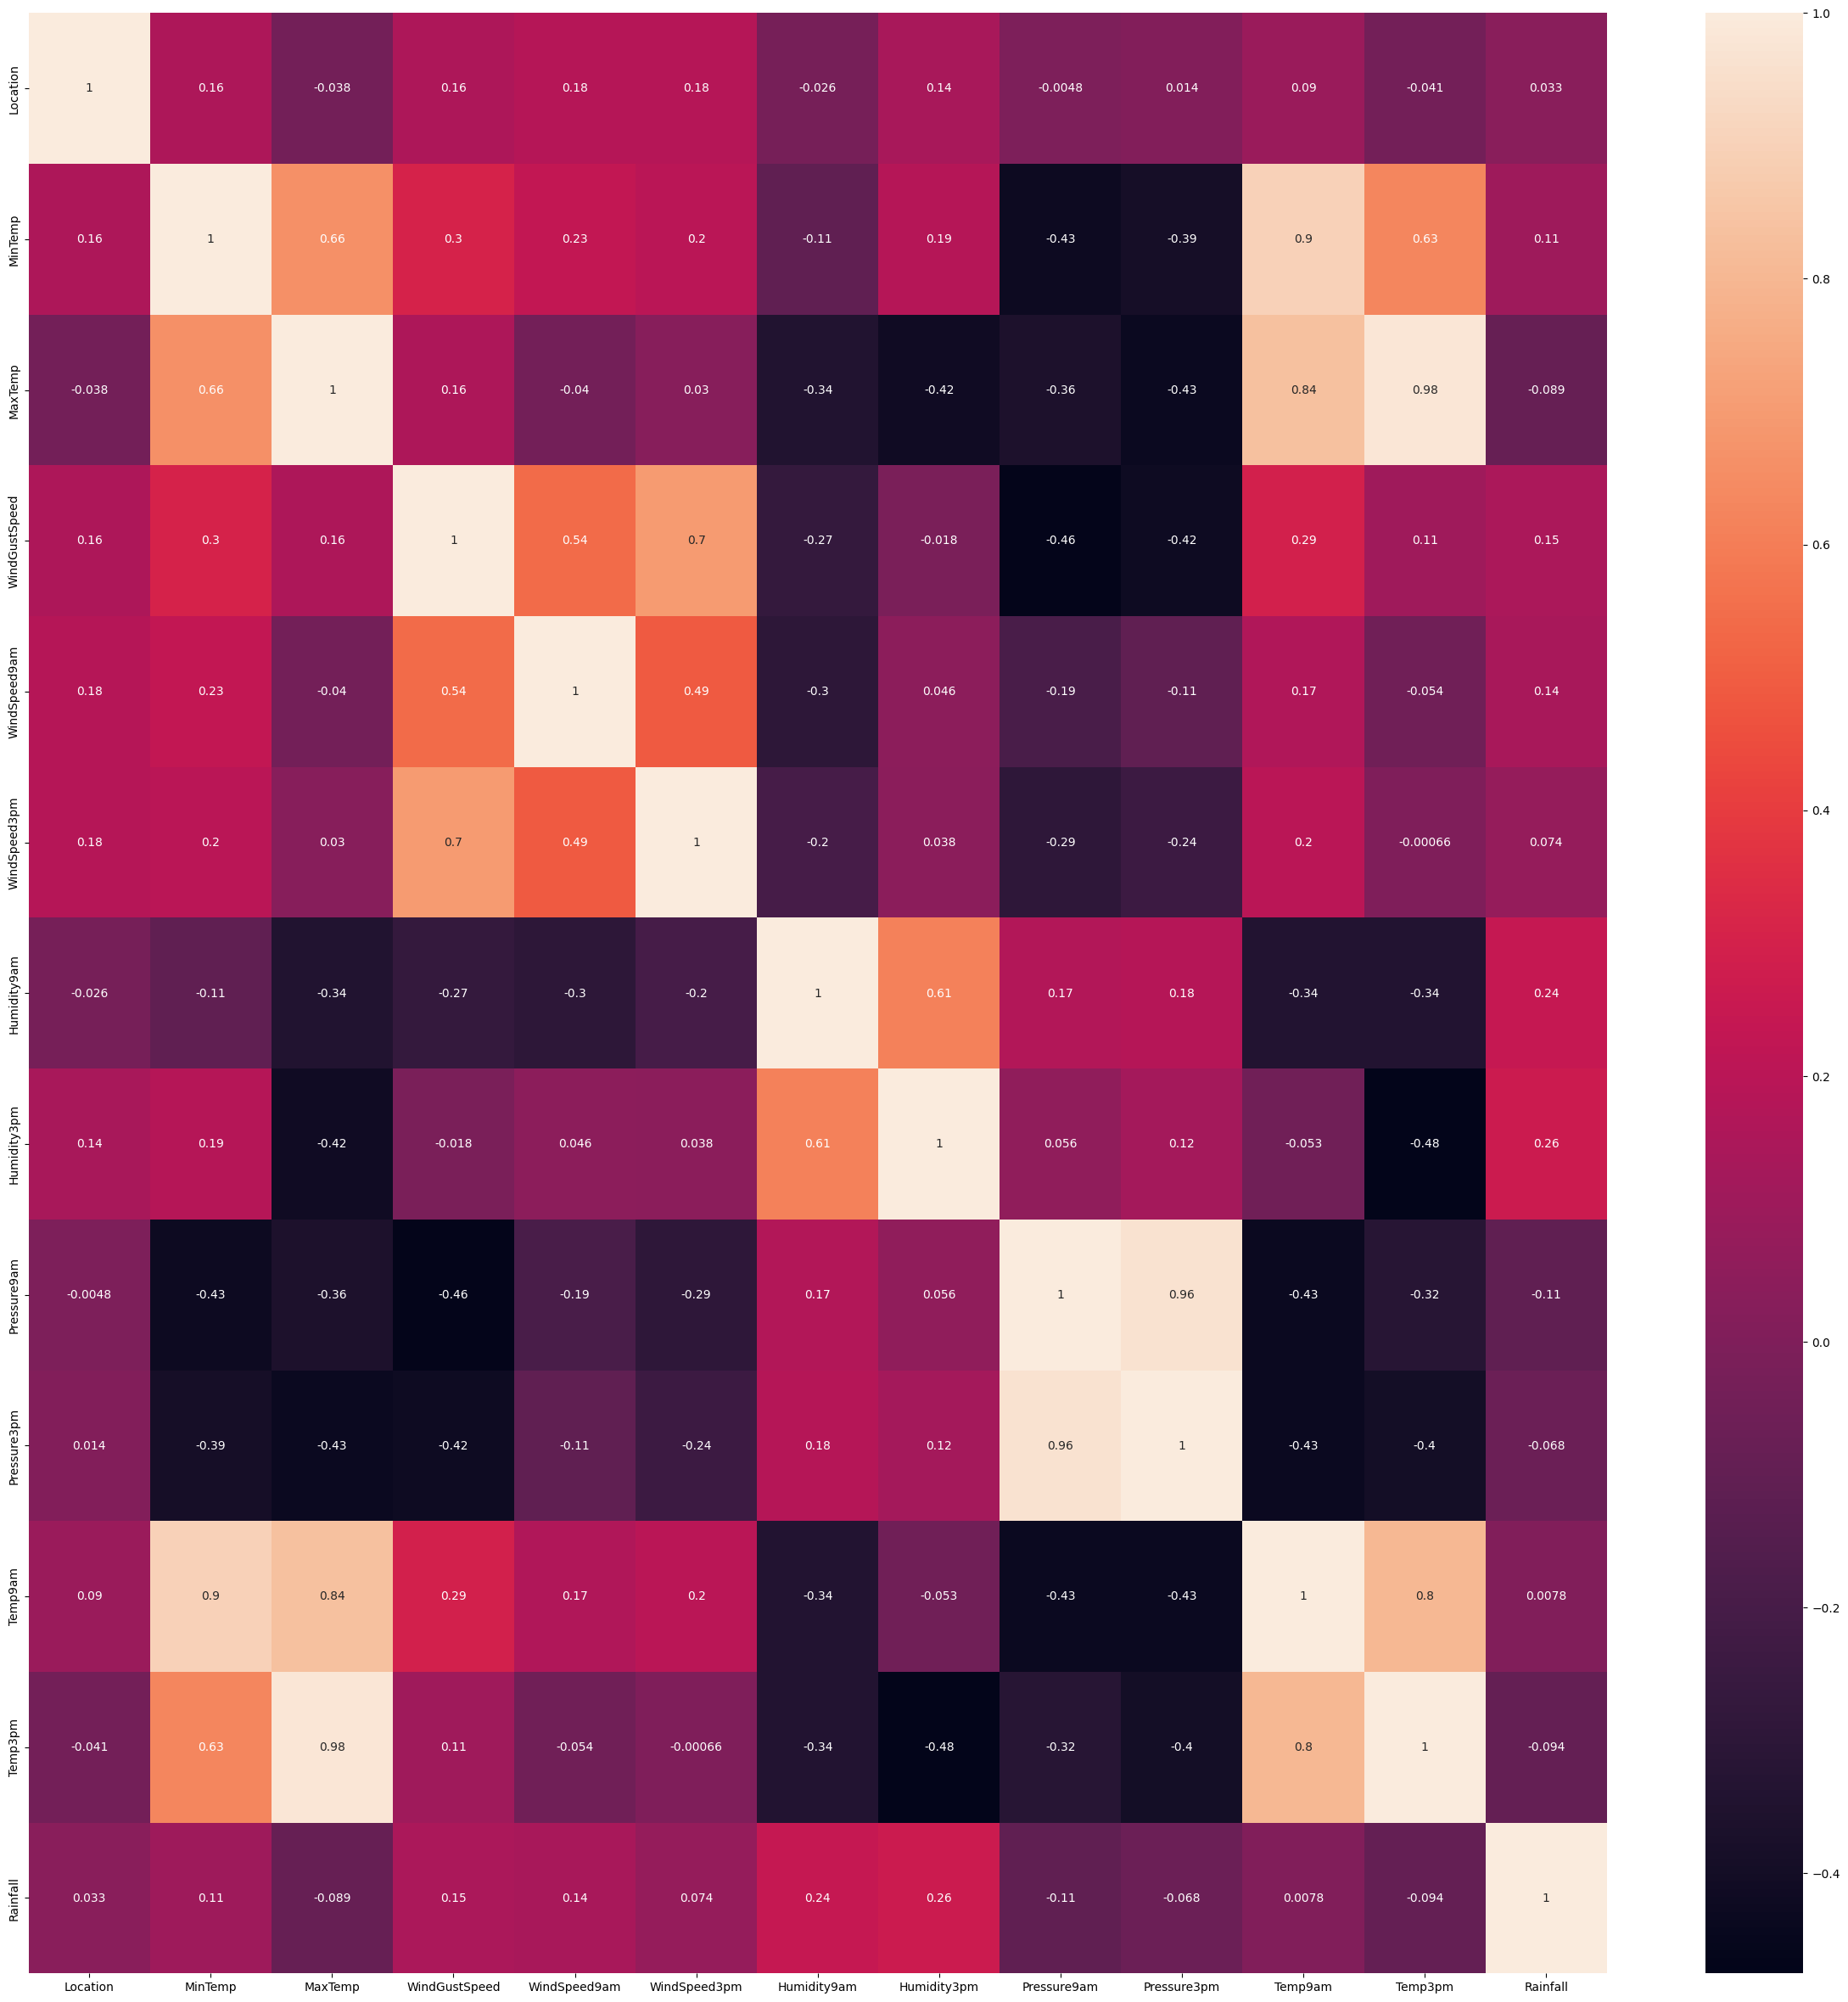

In [18]:
if 'Date' in df.columns:
    df_dropped = df.drop(['Date'], axis='columns')

    # Calculate correlation and plot heatmap
    import seaborn as sns # Import seaborn for heatmap
    plt.subplots(figsize=(30,30))
    sns.heatmap(df_dropped.corr(), annot=True)
else:
    print("Column 'Date' not found in DataFrame.")

In [34]:
inputs = df_dropped.drop('Rainfall',axis='columns')
target = df_dropped.Rainfall

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)


In [47]:
threshold = df_dropped['Rainfall'].median()  # Or choose a meaningful threshold

# Create a new categorical target variable
df_dropped['Rainfall_Category'] = df_dropped['Rainfall'].apply(lambda x: 'High Rainfall' if x > threshold else 'Low Rainfall')

# Recreate inputs and target after creating the categorical variable
inputs = df_dropped.drop(['Rainfall', 'Rainfall_Category'], axis='columns')
target = df_dropped['Rainfall_Category']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

# Fit the logistic regression model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
lr_clf.score(X_test, y_test)

0.7532660935490422

In [50]:
y_predict = lr_clf.predict(X_test)
y_predict

array(['Low Rainfall', 'Low Rainfall', 'Low Rainfall', ...,
       'High Rainfall', 'Low Rainfall', 'Low Rainfall'], dtype=object)

In [52]:
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

High Rainfall       0.70      0.58      0.63      5432
 Low Rainfall       0.78      0.86      0.81      9341

     accuracy                           0.75     14773
    macro avg       0.74      0.72      0.72     14773
 weighted avg       0.75      0.75      0.75     14773



<Axes: >

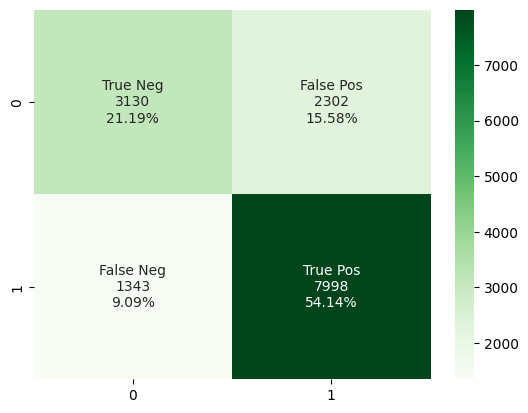

In [56]:
conf_matrix = confusion_matrix(y_test, y_predict)
# Use the calculated confusion matrix as data for the heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)] # Removed extra bracket here
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Greens')

In [61]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [62]:
model.score(X_test, y_test)

0.7291680768970419

In [63]:
 y_predictx = model.predict(X_test)
 y_predictx

array(['Low Rainfall', 'Low Rainfall', 'Low Rainfall', ...,
       'Low Rainfall', 'High Rainfall', 'Low Rainfall'], dtype='<U13')

In [64]:
print(classification_report(y_test, y_predictx))

               precision    recall  f1-score   support

High Rainfall       0.63      0.63      0.63      5432
 Low Rainfall       0.79      0.79      0.79      9341

     accuracy                           0.73     14773
    macro avg       0.71      0.71      0.71     14773
 weighted avg       0.73      0.73      0.73     14773



<Axes: >

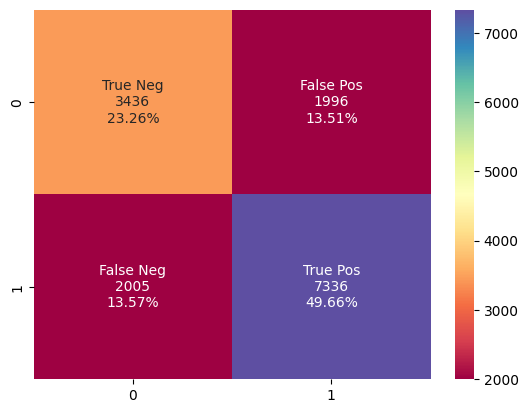

In [71]:

conf_matrix = confusion_matrix(y_test, y_predictx)
# Use the calculated confusion matrix as data for the heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)] # Removed extra bracket here
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Spectral')

In [77]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predictz = clf.predict(X_test)

In [78]:
clf.score(X_test,y_test)

0.6819197184051987

In [79]:
print(classification_report(y_test, y_predictz))

               precision    recall  f1-score   support

High Rainfall       0.57      0.58      0.57      5432
 Low Rainfall       0.75      0.74      0.75      9341

     accuracy                           0.68     14773
    macro avg       0.66      0.66      0.66     14773
 weighted avg       0.68      0.68      0.68     14773



<Axes: >

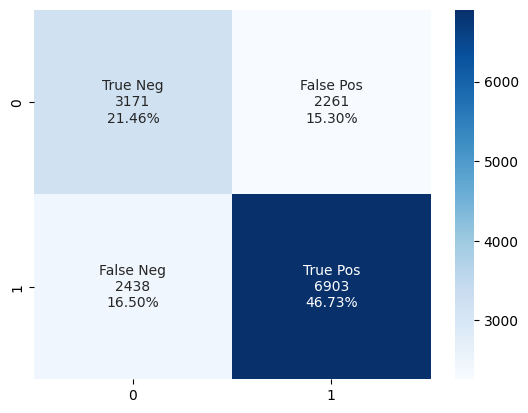

In [80]:
conf_matrix = confusion_matrix(y_test, y_predictz)
# Use the calculated confusion matrix as data for the heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)] # Removed extra bracket here
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

In [88]:
rf = RandomForestClassifier(criterion='entropy',
                             n_estimators=200)
rf.fit(X_train, y_train)
y_predictw = rf.predict(X_test)

In [86]:
rf.score(X_test,y_test)

0.7703242401678738

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictw))

               precision    recall  f1-score   support

High Rainfall       0.74      0.58      0.65      5432
 Low Rainfall       0.78      0.88      0.83      9341

     accuracy                           0.77     14773
    macro avg       0.76      0.73      0.74     14773
 weighted avg       0.77      0.77      0.76     14773



<Axes: >

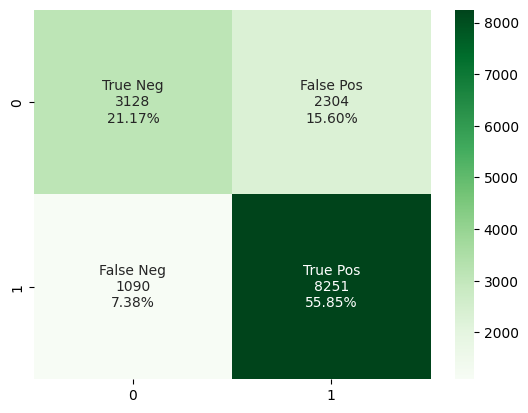

In [93]:
conf_matrix = confusion_matrix(y_test, y_predictw)
# Use the calculated confusion matrix as data for the heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)] # Removed extra bracket here
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Greens')